In [1]:
from keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from keras.utils import to_categorical
import pandas as pd

Using TensorFlow backend.
/Users/hp7tron/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/hp7tron/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/hp7tron/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/hp7tron/opt/anaconda3/lib/pytho

In [2]:
data = pd.read_csv("skindataset.txt",header=None ,sep='\t', engine='python')
print(data)


          0    1    2  3
0        74   85  123  1
1        73   84  122  1
2        72   83  121  1
3        70   81  119  1
4        70   81  119  1
...     ...  ...  ... ..
245052  163  162  112  2
245053  163  162  112  2
245054  163  162  112  2
245055  163  162  112  2
245056  255  255  255  2

[245057 rows x 4 columns]


In [3]:
sentences_training = data.iloc[:,:-1].values
classification_training =data.iloc[:,3].values
x = preprocessing.LabelEncoder().fit_transform(classification_training)
x = to_categorical(x)
print(sentences_training.shape)

(245057, 3)


In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(sentences_training, x, test_size = 0.8)
max_futures=1500
maxlen=3
batch_size=4096   
embedding_dims=400
epochs=5

x_train=x_train/255
x_test = x_test/255
print(x_test.shape)
print(x_train.shape)


(196046, 3)
(49011, 3)


In [5]:
from keras.models import Sequential
from keras.layers import Dense , Activation
from keras.layers import Embedding
from keras.layers import Conv1D,GlobalMaxPooling1D,Dropout,Flatten


In [6]:
print('Model build..')



model=Sequential()
model.add(Embedding(max_futures, embedding_dims,input_length=maxlen))


model.add(Conv1D(embedding_dims, 3, padding='valid', activation='relu', strides=1))
model.add(GlobalMaxPooling1D())

model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='Adadelta', metrics=['accuracy'])
model.summary()
history=model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

'''
model=Sequential()

model.add(Conv2D(64,(3,3),padding='same',input_shape=(122528,28,4)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))


model.add(Dense(1))
model.add(Activation('sigmoid'))
    
model.compile(loss='binary_crossentropy', optimizer='Adadelta', metrics=['accuracy'])
model.summary()
t=model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

'''
'''
model = Sequential()
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(245057, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(250, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
t = model.fit(x_train, y_train,batch_size=256, epochs=10, validation_split=0.2 )
'''
          

Model build..
Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 3, 400)            600000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1, 400)            480400    
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 400)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 802       
_________________________________________________________________
activation_1 (Activation)    (None, 2)                 0         
Total params: 1,081,202
Trainable params: 1,081,202
Non-trainable params: 0
_________________________________________________________________
Instructions for updatin

"\nmodel = Sequential()\nmodel.add(Conv2D(32, (5, 5), activation='relu', input_shape=(245057, 3)))\nmodel.add(MaxPooling2D(pool_size=(2, 2)))\nmodel.add(Conv2D(64, (5, 5), activation='relu'))\nmodel.add(MaxPooling2D(pool_size=(2, 2)))\nmodel.add(Flatten())\nmodel.add(Dense(1000, activation='relu'))\nmodel.add(Dropout(0.5))\nmodel.add(Dense(500, activation='relu'))\nmodel.add(Dropout(0.5))\nmodel.add(Dense(250, activation='relu'))\nmodel.add(Dense(10, activation='softmax'))\nmodel.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])\nt = model.fit(x_train, y_train,batch_size=256, epochs=10, validation_split=0.2 )\n"

In [7]:
la_ratio=model.evaluate(x_test,y_test)
print('Loss/Accuracy :', la_ratio)


49012/49012 [==============================] - 2s 36us/step
Loss/Accuracy : [0.5062416280462996, 0.7943156957626343]


/Users/hp7tron/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Unrecognized location 'bottom left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  # Remove the CWD from sys.path while we load stuff.


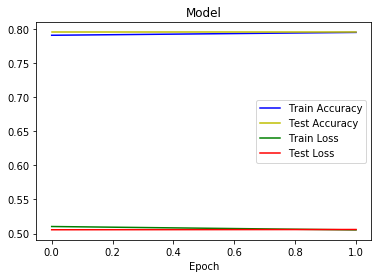

None


In [17]:
from matplotlib import pyplot as plt


plt.plot(t.history['accuracy'],color='b', label="Training accuracy")
plt.plot(t.history['val_accuracy'],color='y', label="Test accuracy")
plt.plot(t.history['loss'],color='g', label="Training loss")
plt.plot(t.history['val_loss'],color='r', label="Test accuracy")
plt.title('Model')
plt.xlabel('Epoch')
plt.legend(['Train Accuracy','Test Accuracy','Train Loss','Test Loss'],loc='bottom left')
print(plt.show())

[[  424  9790]
 [  291 38507]]
(<Figure size 432x288 with 1 Axes>, <matplotlib.axes._subplots.AxesSubplot object at 0x1a27c048d0>)


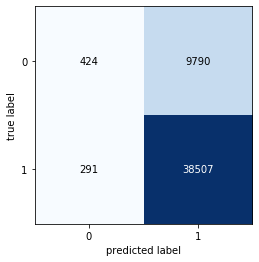

In [8]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import numpy as np

rounded_pred = model.predict_classes(x_test, batch_size=128, verbose=0)
rounded_labels=np.argmax(y_test, axis=1)
print(confusion_matrix(rounded_labels,rounded_pred))
print(plot_confusion_matrix(conf_mat=confusion_matrix(rounded_labels,rounded_pred)))

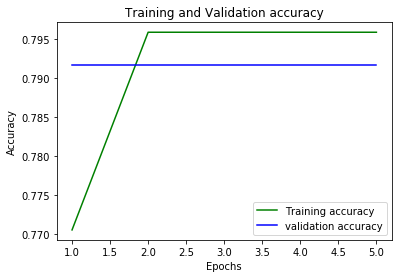

In [8]:
#history = model.fit(...........)
import matplotlib.pyplot as plt
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,6)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

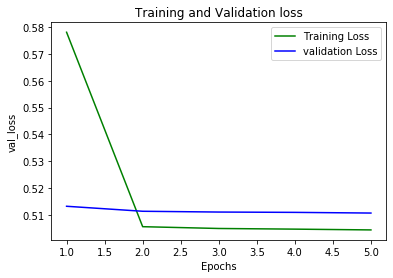

In [10]:

loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,6)
plt.plot(epochs, loss_train, 'g', label='Training Loss')
plt.plot(epochs, loss_val, 'b', label='validation Loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('val_loss')
plt.legend()
plt.show()